In [654]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time #用于随机划分数据集
import random

#使用ipython的魔法方法, 将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] #加上表头
Original_Data=pd.read_csv('.\\housing data.csv',header = None,delimiter = r"\s+",names=column_names)

plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

# 数据分析

In [655]:
Process_Data = Original_Data.copy()
print(Process_Data.shape)
Process_Data.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**先查看数据的前五行，对数据有大致的了解**

In [656]:
Process_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**全是non-null，所以没有缺失值**

In [657]:
Process_Data['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

**查看MEDV的各种信息，为了减少误差，我们通常将最大值和最小值的数据去除**

In [658]:
Process_Data = Process_Data[(Process_Data['MEDV'] < 50) & (Process_Data['MEDV'] > 5)]#去除最大值和最小值所在的数据组

In [659]:
print(Process_Data.shape)
Process_Data.head()

(488, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 数据可视化

In [660]:
plt.style.use({'figure.figsize':(15,10)}) #设置绘图大小

<Axes: >

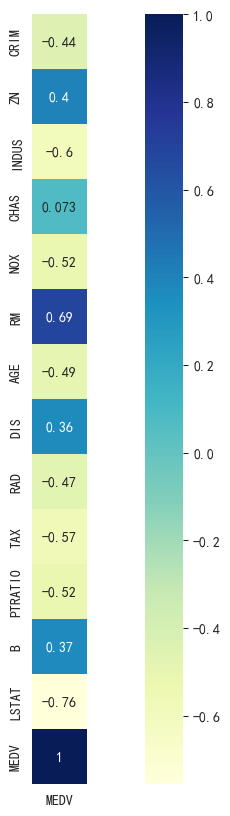

In [661]:
Process_Data_Corr = Process_Data.corr()
MEDV_corr = Process_Data_Corr['MEDV']
sns.heatmap(pd.DataFrame(MEDV_corr),square=True,annot=True,cmap='YlGnBu') # 热力图  MEDV与其他13个特征量皮尔森相关系数

**由图可知，皮尔森系数绝对值大于0.5的特征量有：INDUS,NOX,RM,TAX,PTRATIO,LSTAT。所以我们去除其他特征量**

In [662]:
Process_Data = Process_Data.loc[:,['INDUS','NOX','RM','TAX','PTRATIO','LSTAT','MEDV']] #保留INDUS,NOX,RM,TAX,PTRATIO,LSTAT特征量

In [663]:
print(Process_Data.shape)
Process_Data.head()

(488, 7)


,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


<Axes: >

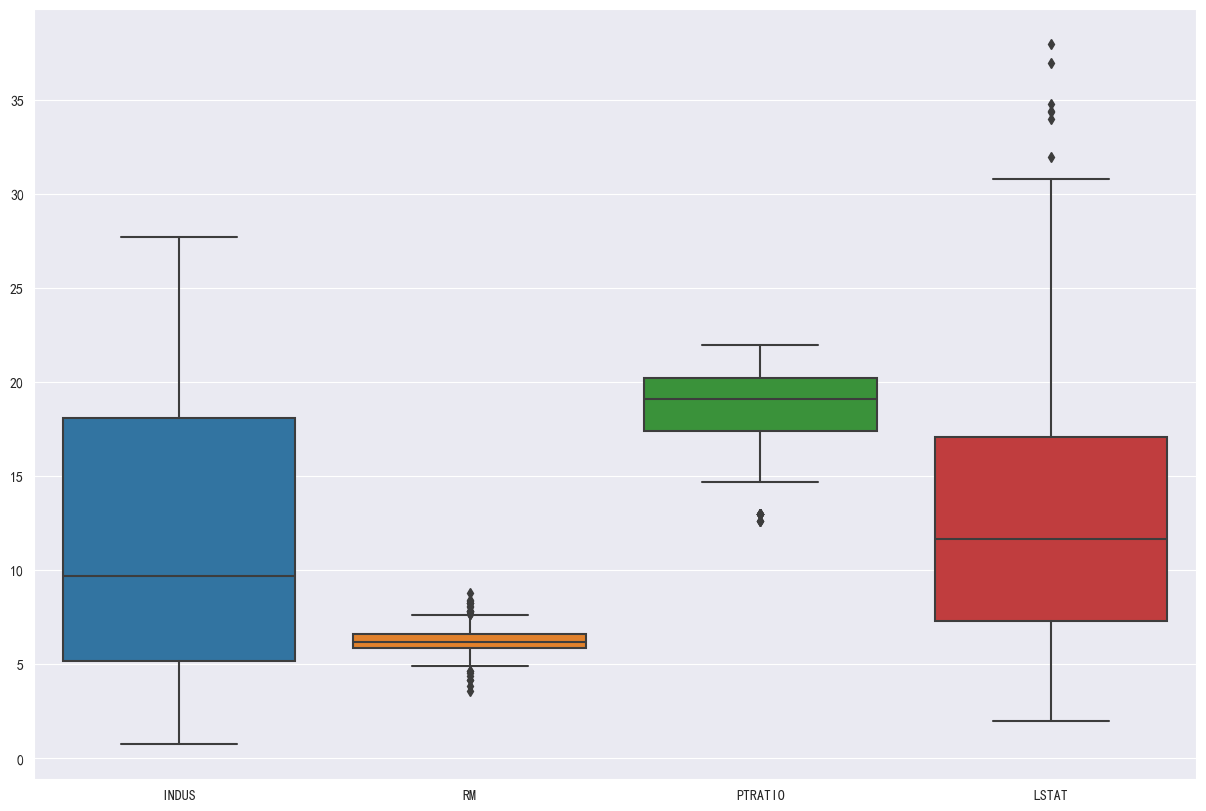

In [664]:
sns.boxplot(data=Process_Data[['INDUS','RM','PTRATIO','LSTAT']])

<Axes: >

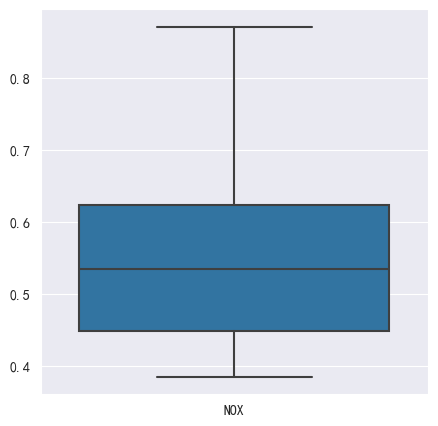

In [665]:
plt.style.use({'figure.figsize':(5,5)}) #设置绘图大小
sns.boxplot(data=Process_Data[['NOX']]) #单位较小分开画图

<Axes: >

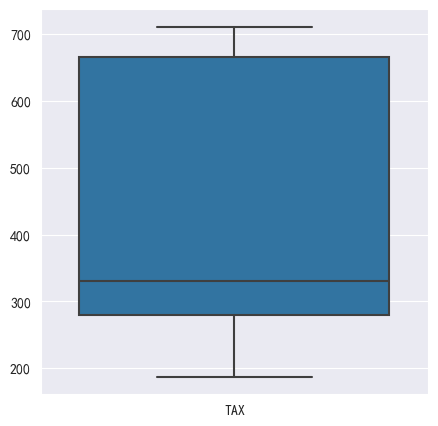

In [666]:
sns.boxplot(data=Process_Data[['TAX']]) #单位较大分开画图

**通过观察箱型图可知，RM,PTRATIO,LSTAT数据组中均有异常值，应该去除**

In [667]:
plt.style.use({'figure.figsize':(15,10)}) #设置绘图大小

In [668]:
def remove(s):
    global Process_Data
    # 计算异常值的阈值
    q1 = Process_Data[s].quantile(0.25)
    q3 = Process_Data[s].quantile(0.75)
    iqr = q3 - q1
    
    # 确定异常值的范围
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # 使用条件过滤去除异常值
    Process_Data = Process_Data[(Process_Data[s] >= lower_bound) & (Process_Data[s] <= upper_bound)]
remove('RM')
remove('PTRATIO')
remove('LSTAT')

<Axes: >

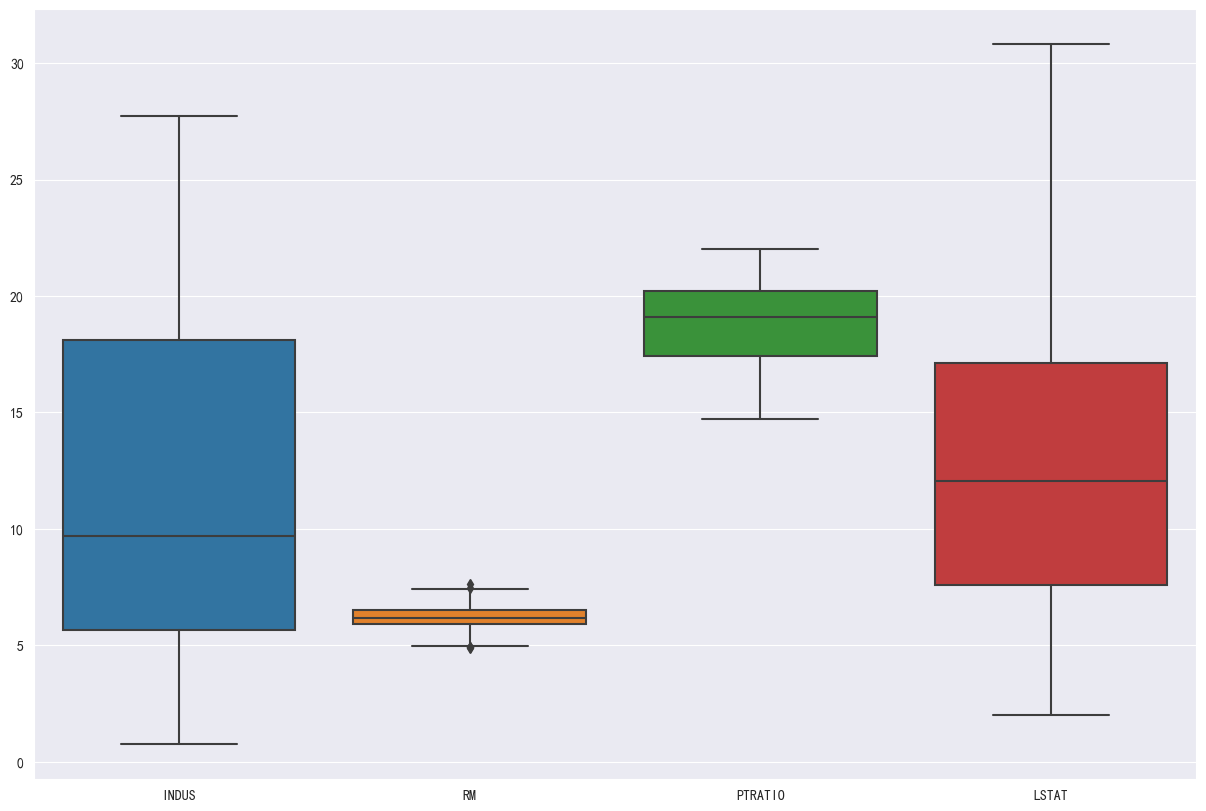

In [669]:
sns.boxplot(data=Process_Data[['INDUS','RM','PTRATIO','LSTAT']])

**去除成功**

In [670]:
print(Process_Data.shape)
Process_Data.head()

(449, 7)


,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


## 特征选择

**先看看数据的直方图**

C:\Users\Xerxes\AppData\Local\Temp\ipykernel_21064\2318957850.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index]) #画图
C:\Users\Xerxes\.conda\envs\pythonProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Xerxes\AppData\Local\Temp\ipykernel_21064\2318957850.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level functi

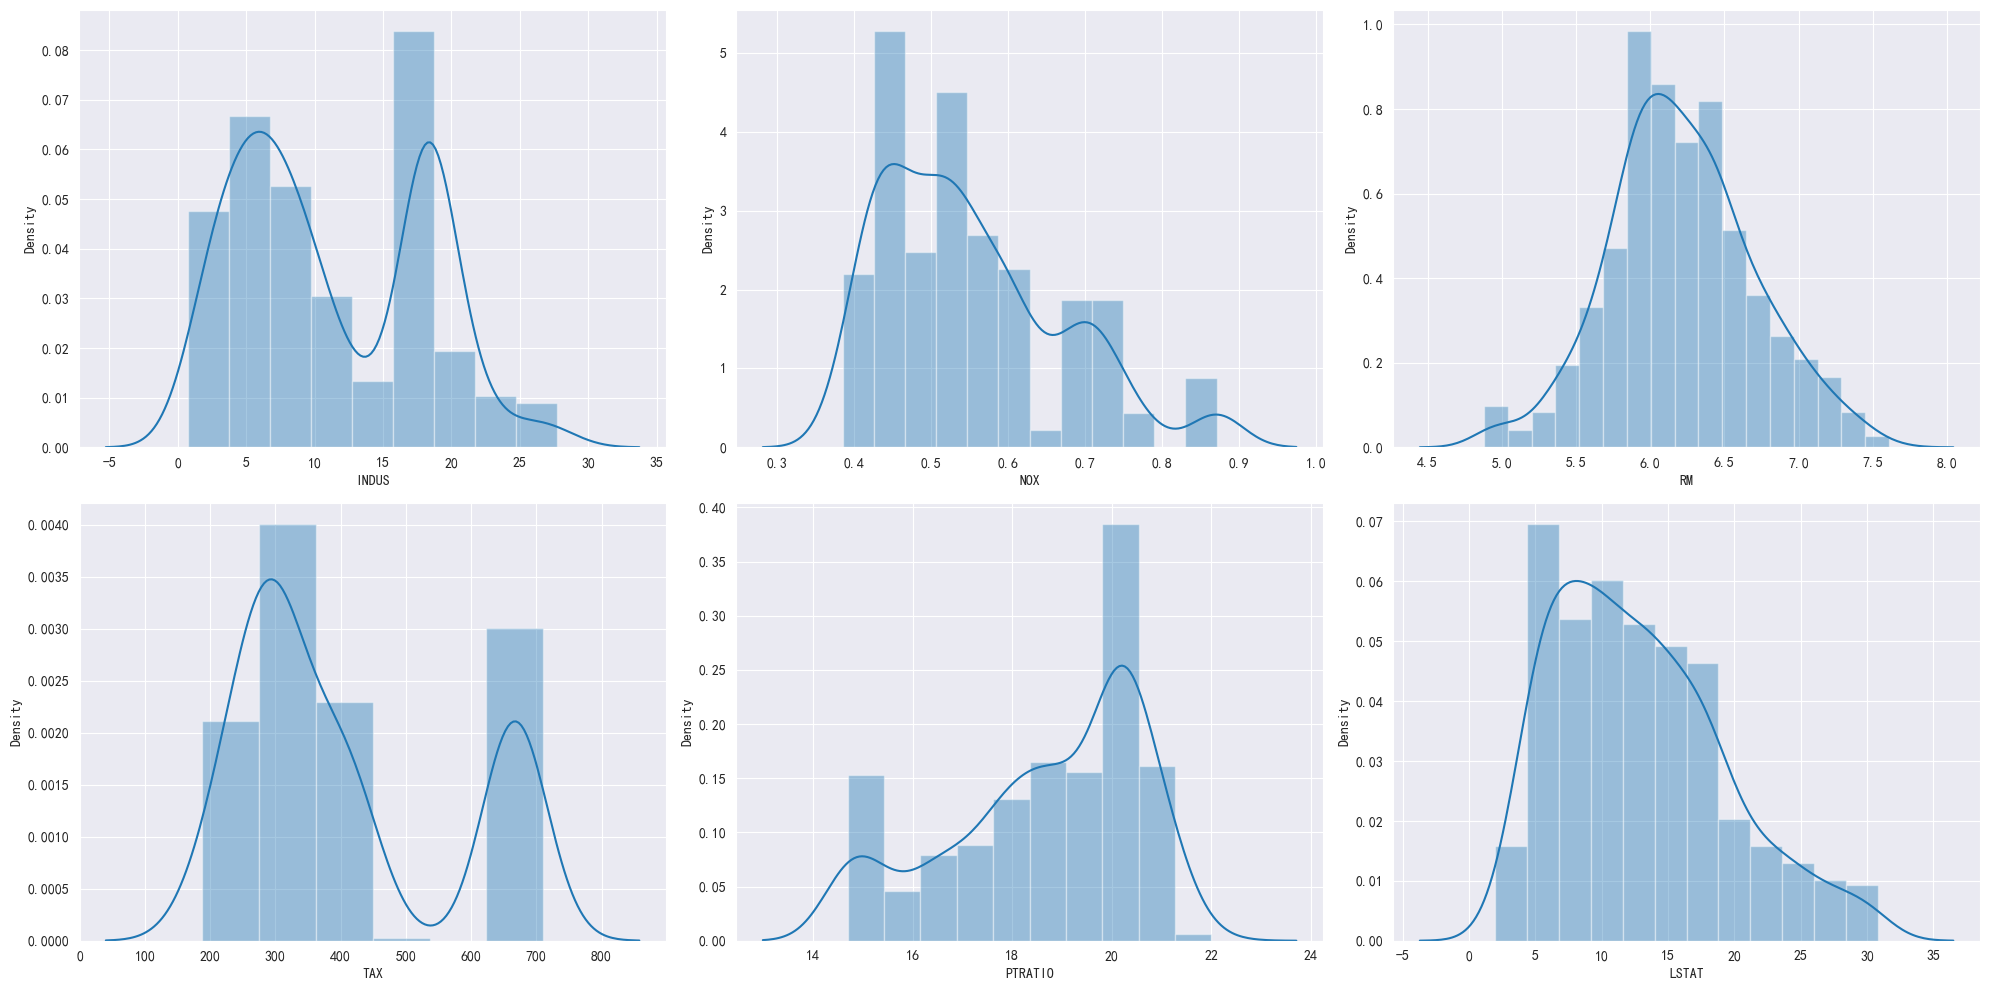

In [671]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10)) #MEDV项不用看
index = 0
axs = axs.flatten() #将axs变为一维
try:
    for k,v in Process_Data.items():
        sns.distplot(v, ax=axs[index]) #画图
        index += 1
except IndexError:
    pass #忽略MEDV项未画出的报错

plt.tight_layout() #微调

**由直方图可知，INDUS,TAX呈双峰分布；NOX,PTRATIO呈偏态分布；RM,LSTAT呈单峰分布**

## 数据归一化

`数据归一化可以让模型训练更高效，知道每类数据对预测结果的贡献度`

In [672]:
Process_Data = Process_Data.to_numpy()
maximums = Process_Data.max(axis=0)
minimums = Process_Data.min(axis=0)
avgs = Process_Data.sum(axis=0)/Process_Data.shape[0]
for i in range(Process_Data.shape[1] - 1): #房价不用归一化
    Process_Data[ : ,i] = (Process_Data[:,i] - avgs[i]) / (maximums[i] - minimums[i]) #运用平均数进行归一化

## 随机划分数据集

In [673]:
seed = int(time.time()) + random.randint(0, 1000) #获取随机种子
random.seed(seed) #设置随机种子
ratio = random.uniform(0.6,0.99) #随机大于0.6小于0.99的比例，用于训练
offset = int(Process_Data.shape[0] * ratio) #计算测试的数据量
Train_Data = Process_Data[:offset] #获取训练集
Test_Data = Process_Data[offset:] #获取测试集
print(Train_Data.shape)
print(Test_Data.shape)

(441, 7)
(8, 7)


In [674]:
train_x = Train_Data[:,:-1]
train_y = Train_Data[:,-1:] #获取自变量和实际值

print(train_x[0])
print(train_y[0])

[-0.33220325 -0.02811781  0.13344755 -0.21311141 -0.46078043 -0.27289379]
[24.]


# 模型设计

In [675]:
class Linear(object): #object表示有多少个特征量
    def __init__(self,num_of_weights):
        seed = int(time.time()) + random.randint(0, 1000) #获取随机种子
        np.random.seed(seed)
        self.w = np.random.rand(num_of_weights,1) #随机产生w的初始值
        self.b = 0. #给常数项赋0的初始值
    
    def forward(self,x):
        z = np.dot(x,self.w) + self.b #计算预测值
        return z
    
    def loss(self,z,y):
        error = z - y #计算残差
        count = error.shape[0] #计算有几组残差
        cost = error * error #残差平方
        cost = np.sum(cost) / count #计算平均残差平方
        return cost
    
    def leastsquares(self,x,y):
        w = np.dot(x.T,x)
        w = np.linalg.inv(w)
        w = np.dot(w,x.T)
        w = np.dot(w,y)
        return w
        
    def gradient(self,x,y):
        z = self.forward(x)
        gradient_w = (z-y) * x
        gradient_w = np.mean(gradient_w, axis=0) #求平均值，用梯度下降法得到梯度向量
        gradient_w = gradient_w[:,np.newaxis] #给变量增加一个维度，便于后面进行向量计算
        
        gradient_b = (z - y) #梯度下降法
        gradient_b = np.mean(gradient_b) #求平均值，结果为一个数值
        return gradient_w,gradient_b
    
    def update(self,gradient_w,gradient_b, eta = 0.01): #设置学习率为0.01
        self.w = self.w - eta * gradient_w #w往下走
        self.b = self.b - eta * gradient_b #b往下走
    
    def train(self,x,y,iterations=1000,eta = 0.01): #默认学习1000次，学习率0.01
        losses = [] #储存平均残差
        for i in range(iterations):
            z = self.forward(x) #每次进行前向计算
            L = self.loss(z,y) #获取每次的平均残差
            gradient_w,gradient_b = self.gradient(x,y) #获取梯度向量
            self.update(gradient_w,gradient_b,eta) #更新w和常数项
            losses.append(L) 
            if ( i + 1 ) % 100 == 0:
                 print('iter {}, loss {}'.format(i,L)) #每训练100次打印平均残差
        return losses, self.w , self.b

**这个类既可以实现最小二乘，也可以实现梯度下降**

## 最小二乘法

In [676]:
test_x = Test_Data[:,:-1] #获取测试集
test_y = Test_Data[:,-1:] #获取实际值

Rgi = Linear(6) #创造模型
square_train_x = np.insert(train_x,0,1,axis=1) #加多一维常数项
w = Rgi.leastsquares(square_train_x,train_y) #最小二乘法的w
square_test_x = np.insert(test_x,0,1,axis=1) #加多一维常数项
square_test_z = np.dot(square_test_x,w) #计算预测值
loss = Rgi.loss(square_test_z,test_y) #计算平均残差

df = pd.DataFrame({"实际":test_y.ravel(),"预测":square_test_z.ravel()}) #对比实际值和预测值
print(df)
print('平均残差: {}'.format(loss))

     实际         预测
0  21.2  19.711067
1  17.5  16.968578
2  16.8  19.107588
3  22.4  23.393304
4  20.6  21.807868
5  23.9  26.706469
6  22.0  25.616053
7  11.9  21.995903
平均残差: 16.64365628866974


## 梯度下降法开始训练

In [677]:
iteraions = 1000 #训练次数

losses,w,b = Rgi.train(train_x,train_y,iterations=iteraions,eta = 0.01) #开始训练，训练后保存w和常数项

iter 99, loss 97.84302411331518
iter 199, loss 38.3478484707968
iter 299, loss 26.40967364910297
iter 399, loss 22.169365326946657
iter 499, loss 19.813119475112686
iter 599, loss 18.260007870231334
iter 699, loss 17.1724683990447
iter 799, loss 16.38208453277472
iter 899, loss 15.787380932685725
iter 999, loss 15.324054766269589


**训练过程图**

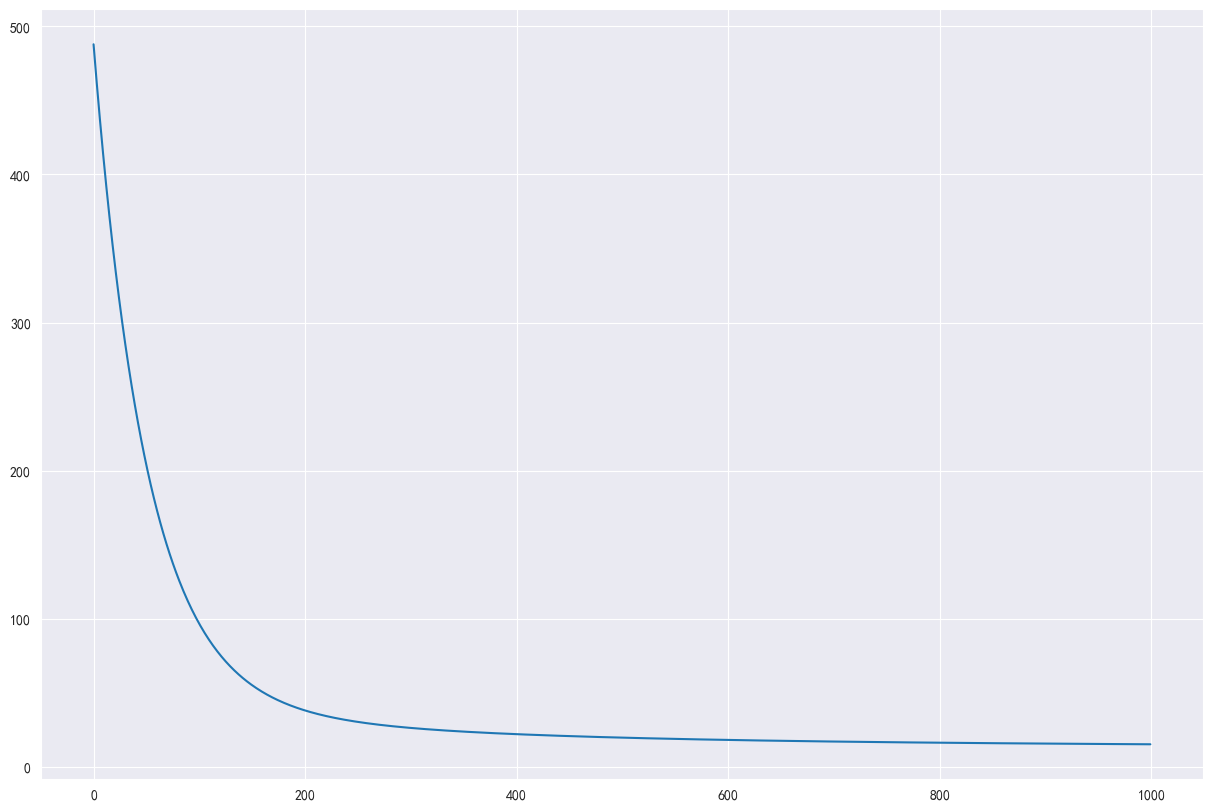

In [678]:
plot_x = np.arange(iteraions) #横坐标为训练第几次
plot_y = np.array(losses) #纵坐标为平均残差
plt.plot(plot_x,plot_y)
plt.show() #图示平均残差随着训练次数的变化

## 利用测试集测试模型

In [679]:
test_z = np.dot(test_x,w) + b #计算预测值
loss = Rgi.loss(test_z,test_y) #计算平均残差

df = pd.DataFrame({"实际":test_y.ravel(),"预测":test_z.ravel()})
print(df)
print('平均残差: {}'.format(loss))

     实际         预测
0  21.2  20.430143
1  17.5  19.222125
2  16.8  20.173095
3  22.4  21.872524
4  20.6  21.156717
5  23.9  23.318745
6  22.0  22.838184
7  11.9  21.229635
平均残差: 12.950854380567408
